# Notebook to look at the current new model performance

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [5]:
#make a plot of each
a4a5_speech_r2=[]
mt_motion_r2=[]
mt_motion_srp01_r2=[]
mt_motion_srp05_r2=[]
mt_motion_srp09_r2=[]
mt_motion_pca5_r2=[]

for sub in good_subjects_list:
    # low level audio features in low level audio regions
    
    # high level audio features in high level auditory regions
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    a4a5_speech_r2.append(np.mean(loaded['stacked_r2s']))
    # r2_new_train.append(np.mean(loaded['train_r2_list']))
    
    # low level visual features in low level visual regions
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-MT_feat-motion_delay-0_ridgecv.npz')
    mt_motion_r2.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-MT_feat-motion_srp01_delay-0_ridgecv.npz')
    mt_motion_srp01_r2.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-MT_feat-motion_srp05_delay-0_ridgecv.npz')
    mt_motion_srp05_r2.append(np.mean(loaded['stacked_r2s']))
    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-MT_feat-motion_srp09_delay-0_ridgecv.npz')
    mt_motion_srp09_r2.append(np.mean(loaded['stacked_r2s']))

    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-MT_feat-motion_pca5_delay-0_ridgecv.npz')
    mt_motion_pca5_r2.append(np.mean(loaded['stacked_r2s']))
    # high level visual features in high level visual regions

In [7]:
import pilot
for feat in ['motion', 'motion_srp01', 'motion_srp05', 'motion_srp09', 'motion_pca5', 'concatspeech']:
    X,features=pilot.load_features(feat)
    print(X.shape[1])


2162
2162
317
163
5
5


/tmp/ipykernel_543627/3727365283.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'MT motion\nn=2162'),
 Text(1, 0, 'MT motion eps=0.1\nn=2162'),
 Text(2, 0, 'MT motion eps=0.5\nn=317'),
 Text(3, 0, 'MT motion eps=0.9\nn=163'),
 Text(4, 0, 'MT motion PCA 5\nn=5'),
 Text(5, 0, 'A4A5 speech\nn=5')]

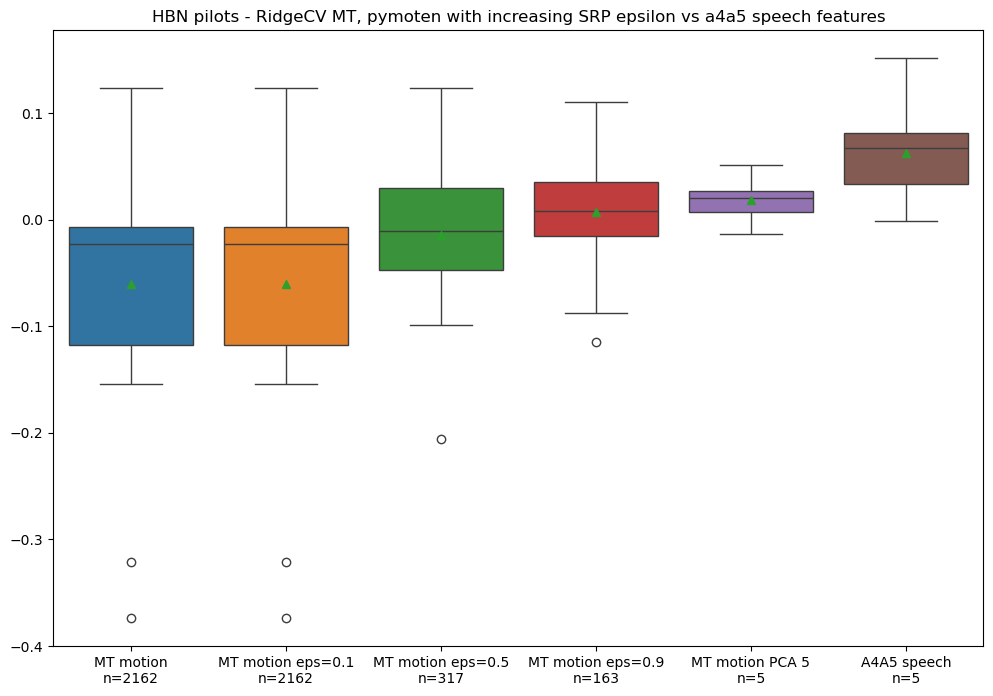

In [11]:


# Number of groups
#N = len(r2_censored)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
#data=[r2_censored,r2_new,r2_censored_train,r2_new_train]
data=[mt_motion_r2,mt_motion_srp01_r2,mt_motion_srp05_r2,mt_motion_srp09_r2,mt_motion_pca5_r2,a4a5_speech_r2]

# # r2_old=[]
# # r2_new=[]
# # ridgeCV_old=[]
# # ridgeCV_new=[]
# # Number of bars in each group
# num_bars = len(data)

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(15, 6))

# # Set the positions of the groups and width of the bars
# ind = np.arange(N)
# width = 0.18
# #labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
# labels=['Old RidgeCV Speech','New RidgeCV Speech','Old Stacked cochresnet50 srp 0.5','New Stacked cochresnet50 srp 0.5']
# # Create bars for each list
# alphas=[0.2,0.2,1,1]
# colors=['r','b','red','blue']
# for i, lst in enumerate(data):
#     ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

# title='HBN pilots - RidgeCV Speech and CochResNet50 SRP 0.5 improvement without censoring'
# # Add labels, title, and legend
# ax.set_xlabel(' hbn subjects')
# ax.set_ylabel('Values')
# ax.set_title(title)
# ax.set_xticks(ind + width / num_bars)
# ax.set_xticklabels([f's{i+1}' for i in range(N)])
# ax.legend()

# # Show the plot
# plt.show()



title='HBN pilots - RidgeCV MT, pymoten with increasing SRP epsilon vs a4a5 speech features'
labels=['MT motion\nn=2162','MT motion eps=0.1\nn=2162','MT motion eps=0.5\nn=317','MT motion eps=0.9\nn=163','MT motion PCA 5\nn=5','A4A5 speech\nn=5']


fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)

### quickly double check motion feature code

(17997, 2162)
(750, 2162)
(750, 2162)


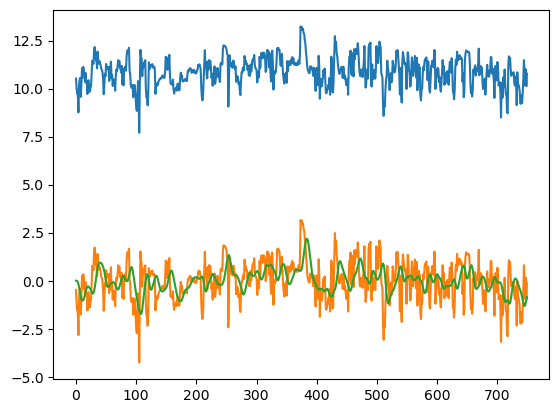

In [14]:
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler
import hrf_tools
import matplotlib.pyplot as plt
# from sklearn.random_projection import johnson_lindenstrauss_min_dim
# from sklearn.random_projection import SparseRandomProjection
import h5py
# Path to the HDF5 file
hdf5_path = '../data/features/DM_pymoten.h5'
# Open the HDF5 file
with h5py.File(hdf5_path, 'r') as hdf5_file:
    # Access the dataset
    motion_features = hdf5_file['pymoten'][:]
print(motion_features.shape)
# plt.plot(motion_features[:,0])
# eps=0.5
scaler = StandardScaler()

X = resample(motion_features, 750, axis=0)
plt.plot(X[:,0])

# X=np.log(X)
# plt.plot(X[:,0])

X = scaler.fit_transform(X=X,y=None)
plt.plot(X[:,0])



print(X.shape)
hz=X.shape[0]/600 #703 seconds in friends
X=hrf_tools.apply_optimal_hrf_10hz(X,hz)
plt.plot(X[:,0])

print(X.shape)
features=['motion']

In [29]:
from scipy.signal import resample
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
import h5py
# Path to the HDF5 file
hdf5_path = '../data/features/DM_pymoten.h5'
# Open the HDF5 file
with h5py.File(hdf5_path, 'r') as hdf5_file:
    # Access the dataset
    motion_features = hdf5_file['pymoten'][:]
eps=0.5
scaler = StandardScaler()
X = resample(motion_features, 750, axis=0)
X = scaler.fit_transform(X=X,y=None)
n_samples=X.shape[0]
n_components=johnson_lindenstrauss_min_dim(n_samples=n_samples, eps=eps)
if n_components < n_samples:
    srp = SparseRandomProjection(n_components=n_components,random_state=42)
    X=srp.fit_transform( X )
hz=X.shape[0]/600 #703 seconds in friends
X=hrf_tools.apply_optimal_hrf_10hz(X,hz)
print(X.shape)
features=['motion']

(750, 317)


In [35]:
johnson_lindenstrauss_min_dim(n_samples=n_samples, eps=0.9)

158

### make a 5 pca motion feature

(750, 5)


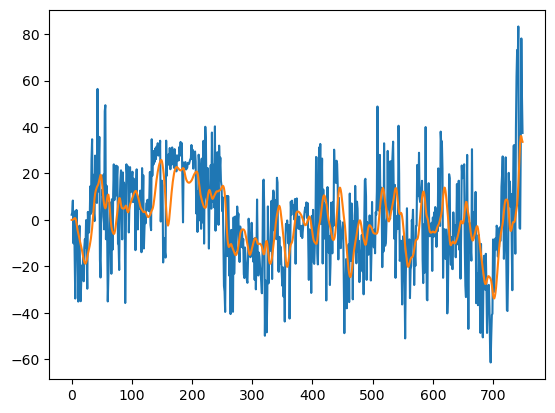

In [62]:
import nat_asd_utils


from sklearn.decomposition import PCA
hdf5_path = '../data/features/DM_pymoten.h5'
# Open the HDF5 file
with h5py.File(hdf5_path, 'r') as hdf5_file:
    # Access the dataset
    motion_features = hdf5_file['pymoten'][:]
eps=0.5
scaler = StandardScaler()
X = resample(motion_features, 750, axis=0)
X = scaler.fit_transform(X=X,y=None)
n_samples=X.shape[0]
transformer = PCA(n_components=5)
X=transformer.fit_transform(X)
hz=X.shape[0]/600 #703 seconds in friends
X=hrf_tools.apply_optimal_hrf_10hz(X,hz)
features=['motion']





# from sklearn.decomposition import PCA
# features=features_cochresnet
# X_raw=nat_asd_utils.load_audio_features('DM',features)
# X=nat_asd_utils.standardscale(X_raw)
# X=nat_asd_utils.apply_pca(X, 1)
# for xx in X:
#     hz=xx.shape[0]/600
#     hrf_tools.apply_optimal_hrf_10hz(xx,hz)

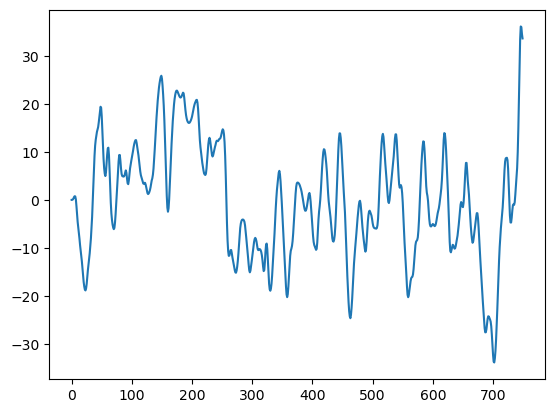